# <span style=color:red> Extract and Visualizing </span>

### Extracting essential data from a dataset and displaying it is a necessary part of data science; therefore individuals can make correct decisions based on the data. In this assignment, you will extract some stock data, you will then display this data in a graph.

### Define a Function that Makes a Graph
#### Question 1: Use yfinance to Extract Stock Data
#### Question 2: Use Webscraping to Extract Tesla Revenue Data
#### Question 3: Use yfinance to Extract Stock Data
#### Question 4: Use Webscraping to Extract GME Revenue Data
#### Question 5: Plot Tesla Stock Graph
#### Question 6: Plot GameStop Stock Graph

In [144]:
!pip install yfinance==0.2.38
!pip install pandas==2.2.2
!pip install nbformat


In [145]:
!pip install yfinance
!pip install bs4
!pip install nbformat # veri bilimi, finansal analiz ve web scraping gibi çeşitli görevler için çok kullanışlıdır.

ERROR: Invalid requirement: '#'


In [146]:
import yfinance as yf #Finansal verileri Yahoo Finance'dan çekmek için kullanılır.
import pandas as pd #Python Data Analysis Library
import requests #HTTP istekleri yapmak için kullanılır. (Web sayfası indirmek veya API'lerden veri çeker)
from bs4 import BeautifulSoup #HTML ve XML verilerini ayrıştırmak ve işlemek için kullanılır. WebScraping


import plotly.graph_objects as go #Etkileşimli grafikler ve görselleştirmeler oluşturmak için kullanılır.
from plotly.subplots import make_subplots #Birden fazla grafiği tek bir figür üzerinde düzenlemek için kullanılır.

In [147]:
import warnings
# Ignore all warnings
warnings.filterwarnings("ignore", category=FutureWarning) #Geçici uyarıları engeller !

#### we define the function make_graph. You don't have to know how the function works, you should only care about the inputs. It takes a dataframe with stock data (dataframe must contain Date and Close columns), a dataframe with revenue data (dataframe must contain Date and Revenue columns), and the name of the stock.



In [149]:
def make_graph(stock_data, revenue_data, stock):
    
    # 2 satır ve 1 sütundan oluşan bir subplot oluşturur
    fig = make_subplots(
        rows=2, 
        cols=1, 
        shared_xaxes=True, 
        subplot_titles=("Historical Share Price", "Historical Revenue"), 
        vertical_spacing=0.3
    )
    # Veriyi belirtilen tarihlerle filtreler
    stock_data_specific = stock_data[stock_data.Date <= '2021-06-14']
    revenue_data_specific = revenue_data[revenue_data.Date <= '2021-04-30']
    
    # Hisse senedi fiyatlarını ilk alt grafikte gösterir
    fig.add_trace(
        go.Scatter(
            x=pd.to_datetime(stock_data_specific.Date), 
            y=stock_data_specific.Close.astype("float"), 
            name="Share Price"
        ), 
        row=1, 
        col=1
    )
    
    # Gelir verilerini ikinci alt grafikte gösterir
    fig.add_trace(
        go.Scatter(
            x=pd.to_datetime(revenue_data_specific.Date), 
            y=revenue_data_specific.Revenue.astype("float"), 
            name="Revenue"
        ), 
        row=2, 
        col=1
    )
    
    # İlk alt grafikte X ve Y eksenlerinin başlıklarını ayarlar
    fig.update_xaxes(title_text="Date", row=1, col=1)
    fig.update_yaxes(title_text="Price ($US)", row=1, col=1)
    
    # İkinci alt grafikte X ve Y eksenlerinin başlıklarını ayarlar
    fig.update_xaxes(title_text="Date", row=2, col=1)
    fig.update_yaxes(title_text="Revenue ($US Millions)", row=2, col=1)
    
    # Grafiğin genel düzenini ayarlar
    fig.update_layout(
        showlegend=False,   # Efsaneyi gizler, grafiklerde ve veri görselleştirmelerinde kullanılan bir açıklama elemanıdır. 
        height=900,         # Grafiğin yüksekliğini ayarlar
        title=stock,        # Grafik başlığı olarak hisse senedi adını kullanır
        xaxis_rangeslider_visible=True  # X eksenindeki aralık kaydırıcısını görünür yapar
    )
    
    # Grafiği ekranda gösterir
    fig.show()


## Question 1: Use yfinance to Extract Stock Data
### Using the Ticker function enter the ticker symbol of the stock we want to extract data on to create a ticker object. The stock is Tesla and its ticker symbol is TSLA.

In [151]:
import yfinance as yf

tesla = yf.Ticker("TSLA")


In [152]:
# Extract historical stock data for Tesla
tesla_data = tesla.history(period="max")


print(tesla_data.head())

                               Open      High       Low     Close     Volume  \
Date                                                                           
2010-06-29 00:00:00-04:00  1.266667  1.666667  1.169333  1.592667  281494500   
2010-06-30 00:00:00-04:00  1.719333  2.028000  1.553333  1.588667  257806500   
2010-07-01 00:00:00-04:00  1.666667  1.728000  1.351333  1.464000  123282000   
2010-07-02 00:00:00-04:00  1.533333  1.540000  1.247333  1.280000   77097000   
2010-07-06 00:00:00-04:00  1.333333  1.333333  1.055333  1.074000  103003500   

                           Dividends  Stock Splits  
Date                                                
2010-06-29 00:00:00-04:00        0.0           0.0  
2010-06-30 00:00:00-04:00        0.0           0.0  
2010-07-01 00:00:00-04:00        0.0           0.0  
2010-07-02 00:00:00-04:00        0.0           0.0  
2010-07-06 00:00:00-04:00        0.0           0.0  


In [153]:
# Reset the index of the DataFrame
tesla_data.reset_index(inplace=True)

print(tesla_data.head())

                       Date      Open      High       Low     Close  \
0 2010-06-29 00:00:00-04:00  1.266667  1.666667  1.169333  1.592667   
1 2010-06-30 00:00:00-04:00  1.719333  2.028000  1.553333  1.588667   
2 2010-07-01 00:00:00-04:00  1.666667  1.728000  1.351333  1.464000   
3 2010-07-02 00:00:00-04:00  1.533333  1.540000  1.247333  1.280000   
4 2010-07-06 00:00:00-04:00  1.333333  1.333333  1.055333  1.074000   

      Volume  Dividends  Stock Splits  
0  281494500        0.0           0.0  
1  257806500        0.0           0.0  
2  123282000        0.0           0.0  
3   77097000        0.0           0.0  
4  103003500        0.0           0.0  


## Question 2: Use Webscraping to Extract Tesla Revenue Data

### Use the requests library to download the webpage https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm Save the text of the response as a variable named html_data.

In [156]:
# URL of the webpage
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm"

# Send a GET request to the URL
response = requests.get(url)

# Save the text of the response to a variable
html_data = response.content  # Use .content to get the raw bytes of the response

# Parse the HTML data using BeautifulSoup with 'html5lib' parser
soup_html5lib = BeautifulSoup(html_data, 'html5lib')

# Optionally, parse the HTML data using BeautifulSoup with 'html.parser'
soup_html_parser = BeautifulSoup(html_data, 'html.parser')

# Print the first 500 characters of the parsed HTML (to verify)
print(soup_html5lib.prettify()[:500])
print(soup_html_parser.prettify()[:500])



# Use html5lib if you need robust handling of complex or malformed HTML and you don't mind a potential performance hit.
# Use html.parser for faster parsing of well-formed HTML when you do not need the extensive error handling of html5lib.


<!DOCTYPE html>
<!--[if lt IE 7]>      <html class="no-js lt-ie9 lt-ie8 lt-ie7"> <![endif]-->
<!--[if IE 7]>         <html class="no-js lt-ie9 lt-ie8"> <![endif]-->
<!--[if IE 8]>         <html class="no-js lt-ie9"> <![endif]-->
<!--[if gt IE 8]><!-->
<html class="no-js">
 <!--<![endif]-->
 <head>
  <meta charset="utf-8"/>
  <meta content="IE=edge,chrome=1" http-equiv="X-UA-Compatible"/>
  <link href="https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue" rel="canonical"/>
  <title>
   Te
<!DOCTYPE html>
<!--[if lt IE 7]>      <html class="no-js lt-ie9 lt-ie8 lt-ie7"> <![endif]-->
<!--[if IE 7]>         <html class="no-js lt-ie9 lt-ie8"> <![endif]-->
<!--[if IE 8]>         <html class="no-js lt-ie9"> <![endif]-->
<!--[if gt IE 8]><!-->
<html class="no-js">
 <!--<![endif]-->
 <head>
  <meta charset="utf-8"/>
  <meta content="IE=edge,chrome=1" http-equiv="X-UA-Compatible"/>
  <link href="https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue" rel="canonical"/>
  <title>
   T

### Using BeautifulSoup or the read_html function extract the table with Tesla Revenue and store it into a dataframe named tesla_revenue. The dataframe should have columns Date and Revenue.

In [158]:
# Sayfadaki tüm tablolara erişin
tables = soup.find_all('table')

# 'Date' ve 'Revenue' isimli iki sütunlu boş bir DataFrame oluşturun
tesla_revenue = pd.DataFrame(columns=['Date', 'Revenue'])

# Tüm tablolarda döngü başlatın
for table in tables:

    if "Tesla Quarterly Revenue" in table.text:     # Eğer tablonun içinde "Tesla Quarterly Revenue" başlığı varsa
        rows = table.find_all('tr')        # Tablo satırlarını al
        for row in rows[1:]:     # İlk satırı (başlık satırı) atla ve geri kalan satırlarda döngü başlat
            cols = row.find_all('td') ## Her bir satırdaki hücreleri al, tüm sutunları almamak için koşul oluşturacağız !
            if len(cols) >= 2:        # # Eğer satırda en az iki hücre varsa (tarih ve gelir)
                
                date = cols[0].text.strip()   # Tarih ve gelir verilerini al ve temizle
                revenue = cols[1].text.strip()
                
                revenue = revenue.replace('$', '').replace(',', '')     # Gelir verisindeki dolar işaretlerini ve virgülleri kaldır

                 # Yeni bir DataFrame oluştur ve mevcut DataFrame'e ekleyin
                tesla_revenue = pd.concat([tesla_revenue, pd.DataFrame({"Date": [date], "Revenue": [revenue]})], ignore_index=True) 


print(tesla_revenue.head())

Empty DataFrame
Columns: [Date, Revenue]
Index: []


#### Regex (Regular Expressions), metin içinde desenleri tanımlamak ve bu desenlere göre arama, değiştirme veya diğer işlemler yapmak için kullanılan güçlü bir araçtır. Regex, belirli bir desenle eşleşen metinleri bulmak veya bu metinleri manipüle etmek için kullanılır.

In [160]:
tesla_revenue["Revenue"] = tesla_revenue['Revenue'].replace({',': '', '$': ''}, regex=True)


#,: Replaces commas with an empty string (''), effectively removing commas.
# $: Replaces dollar signs with an empty string (''), effectively removing dollar signs.
# regex=True: This argument allows the replace() method to use regular expressions (regex) for matching patterns, enabling more complex text manipulations.


In [161]:
# This method removes any rows in the tesla_revenue DataFrame that contain missing values (NaN) in any column.
# Eksi verileri droplar
tesla_revenue.dropna(inplace=True)


In [162]:
# Revenue Sütunundaki Boş Stringleri Kaldırma

tesla_revenue = tesla_revenue[tesla_revenue['Revenue'] != ""]
#Bu, Revenue sütunundaki her bir satırı kontrol eden bir boolean maske oluşturur; boş string ("") olmayan satırları True, diğerlerini False olarak işaretler.

## Question 3: Use yfinance to Extract Stock Data

#### Using the Ticker function enter the ticker symbol of the stock we want to extract data on to create a ticker object. The stock is GameStop and its ticker symbol is GME.

In [165]:
import yfinance as yf

# Create a ticker object for GameStop (GME)
game_ticker = yf.Ticker("GME")

# Extract stock data
game_data = game_ticker.history(period="max")

# Display the first few rows of the data
print(game_data.head())


                               Open      High       Low     Close    Volume  \
Date                                                                          
2002-02-13 00:00:00-05:00  1.620129  1.693350  1.603296  1.691667  76216000   
2002-02-14 00:00:00-05:00  1.712708  1.716074  1.670626  1.683251  11021600   
2002-02-15 00:00:00-05:00  1.683250  1.687458  1.658002  1.674834   8389600   
2002-02-19 00:00:00-05:00  1.666417  1.666417  1.578047  1.607503   7410400   
2002-02-20 00:00:00-05:00  1.615920  1.662210  1.603296  1.662210   6892800   

                           Dividends  Stock Splits  
Date                                                
2002-02-13 00:00:00-05:00        0.0           0.0  
2002-02-14 00:00:00-05:00        0.0           0.0  
2002-02-15 00:00:00-05:00        0.0           0.0  
2002-02-19 00:00:00-05:00        0.0           0.0  
2002-02-20 00:00:00-05:00        0.0           0.0  


#### Using the ticker object and the function history extract stock information and save it in a dataframe named gme_data. Set the period parameter to "max" so we get information for the maximum amount of time.



In [167]:
# Create a ticker object for GameStop (GME)
ticker = yf.Ticker("GME") #GameStop hissesinin bir Ticker nesnesini oluşturur. Bu nesne, hisse senedi hakkında çeşitli verileri ve özellikleri elde etmek için kullanılır.

# Extract stock data with maximum period
gme_data = ticker.history(period="max")


# Bu satır, Ticker nesnesinin history fonksiyonunu kullanarak GameStop hissesinin tarihsel fiyat verilerini çeker.
# period="max" parametresi, mümkün olan en uzun tarih aralığını getirir.

In [168]:
# Reset the index
gme_data.reset_index(inplace=True)

# Display the first five rows
print(gme_data.head())

                       Date      Open      High       Low     Close    Volume  \
0 2002-02-13 00:00:00-05:00  1.620129  1.693350  1.603296  1.691667  76216000   
1 2002-02-14 00:00:00-05:00  1.712708  1.716074  1.670626  1.683251  11021600   
2 2002-02-15 00:00:00-05:00  1.683250  1.687458  1.658002  1.674834   8389600   
3 2002-02-19 00:00:00-05:00  1.666417  1.666417  1.578047  1.607503   7410400   
4 2002-02-20 00:00:00-05:00  1.615920  1.662210  1.603296  1.662210   6892800   

   Dividends  Stock Splits  
0        0.0           0.0  
1        0.0           0.0  
2        0.0           0.0  
3        0.0           0.0  
4        0.0           0.0  


## Question 4: Use Webscraping to Extract GME Revenue Data

In [170]:
import requests

# URL of the webpage
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html"

# Download the webpage
response = requests.get(url)
html_data_2 = response.text


In [171]:
import requests
import pandas as pd
from bs4 import BeautifulSoup

# Web sayfasını indir
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html"
response = requests.get(url)
html_data_2 = response.text

# HTML verilerini BeautifulSoup ile analiz et
soup = BeautifulSoup(html_data_2, 'html.parser')

# Tabloyu seç
table = soup.find_all("tbody")[1] #body's second element, find_all. In Python, indexing starts from 0, so [1] refers to the second item.

# Tabloyu DataFrame'e dönüştür
rows = []
for row in table.find_all("tr"): #Each row
    cols = row.find_all("td")  # Each cell (columns)
    cols = [col.text.strip() for col in cols]
    rows.append(cols)

# DataFrame oluştur
gme_revenue = pd.DataFrame(rows, columns=['Date', 'Revenue'])

# Gelir sütununu temizle (dolar işareti ve virgül kaldır)
gme_revenue['Revenue'] = gme_revenue['Revenue'].str.replace(r'[\$,]', '', regex=True).astype(float)

# Sonuçları görüntüle

print(gme_revenue.head())


         Date  Revenue
0  2020-04-30   1021.0
1  2020-01-31   2194.0
2  2019-10-31   1439.0
3  2019-07-31   1286.0
4  2019-04-30   1548.0


## Same code above using reading.hmtml method 
#### Kodun sonucu olarak elde edilen DataFrame (gme_revenue), GameStop'un gelir verilerini içeren ve iki sütun içeren bir tabloyu gösterir:
#### 
##### Date: Tarih
##### Revenue: Gelir (dolar işareti ve virgül içermeyen, sayısal formattaki değerler)
#### Bu veriler daha sonra analiz edilebilir, grafiklerle görselleştirilebilir veya diğer veri işlemleri için kullanılabilir. Kod, veri çekme, temizleme ve düzenleme aşamalarını otomatikleştirerek, kullanıcıya analize hazır bir veri kümesi sağlar.

In [173]:
import requests
import pandas as pd

# Web sayfasını indir
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html"
response = requests.get(url)
html_data_2 = response.text

# HTML verilerini DataFrame'lere oku
dfs = pd.read_html(html_data_2)

# GameStop gelir tablosunu içeren DataFrame'i çıkar (belirtilen indeks 1)
gme_revenue = dfs[1]

# Sütun isimlerini kontrol et ve düzenle
gme_revenue.columns = ['Date', 'Revenue']

# Gelir sütununu temizle (dolar işareti ve virgül kaldır)
gme_revenue['Revenue'] = gme_revenue['Revenue'].str.replace(r'[\$,]', '', regex=True).astype(float)

# Sonuçları görüntüle
print(gme_revenue.head()) #first 5 row


         Date  Revenue
0  2020-04-30   1021.0
1  2020-01-31   2194.0
2  2019-10-31   1439.0
3  2019-07-31   1286.0
4  2019-04-30   1548.0


In [174]:
print(gme_revenue.tail()) #last 5 row

          Date  Revenue
57  2006-01-31   1667.0
58  2005-10-31    534.0
59  2005-07-31    416.0
60  2005-04-30    475.0
61  2005-01-31    709.0


In [174]:
print(gme_revenue.tail()) #last 5 row

          Date  Revenue
57  2006-01-31   1667.0
58  2005-10-31    534.0
59  2005-07-31    416.0
60  2005-04-30    475.0
61  2005-01-31    709.0


# QUESTİON 5: PLOTS GRAPHS

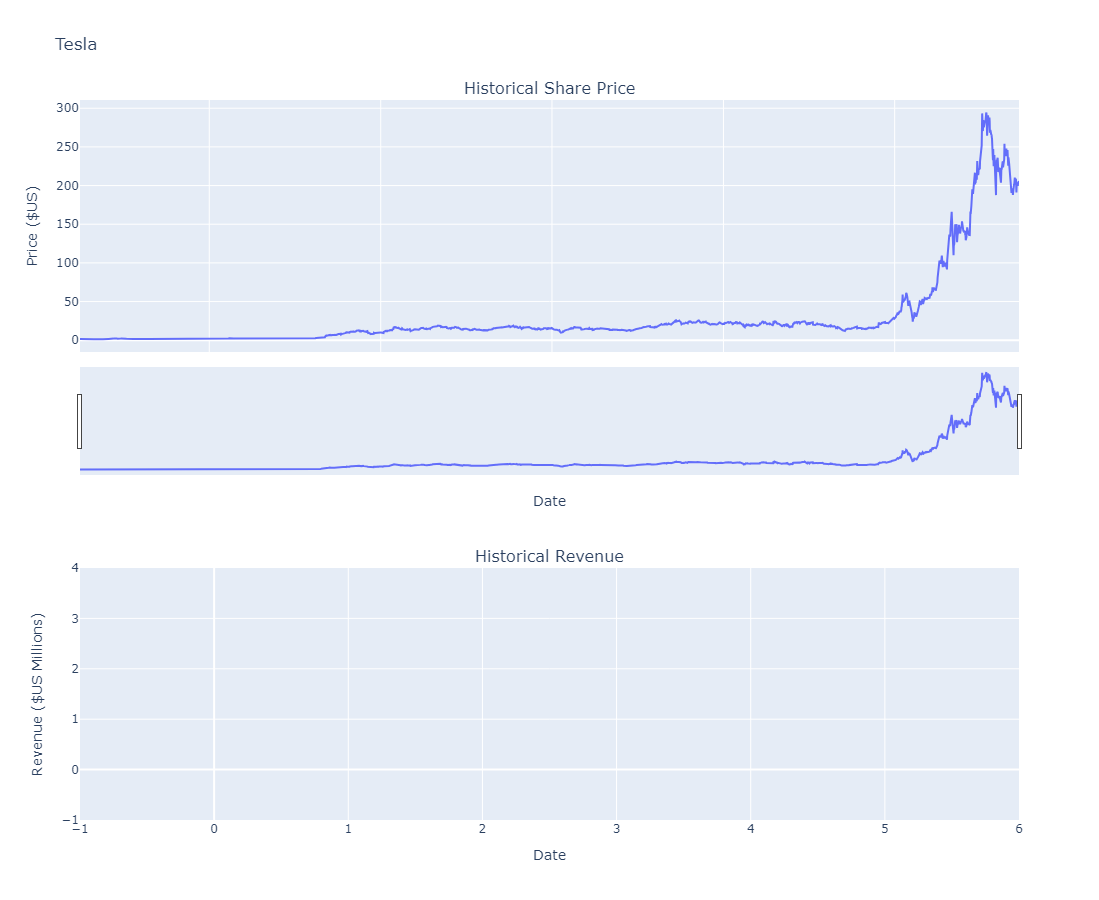

In [204]:
 make_graph(tesla_data, tesla_revenue, 'Tesla')

#Tesla'nın Hisse Senedi Fiyatları (Çizgi Grafiği):


# 1 Grafik:
# X ekseni: Tarih (Zaman)
# Y ekseni (sol): Hisse senedi fiyatları


# 2.Grafik:

#Tesla'nın Gelirleri (Çubuk Grafiği):

#X ekseni: Tarih (Zaman)
#Y ekseni (sağ): Gelir (Milyon dolar cinsinden)


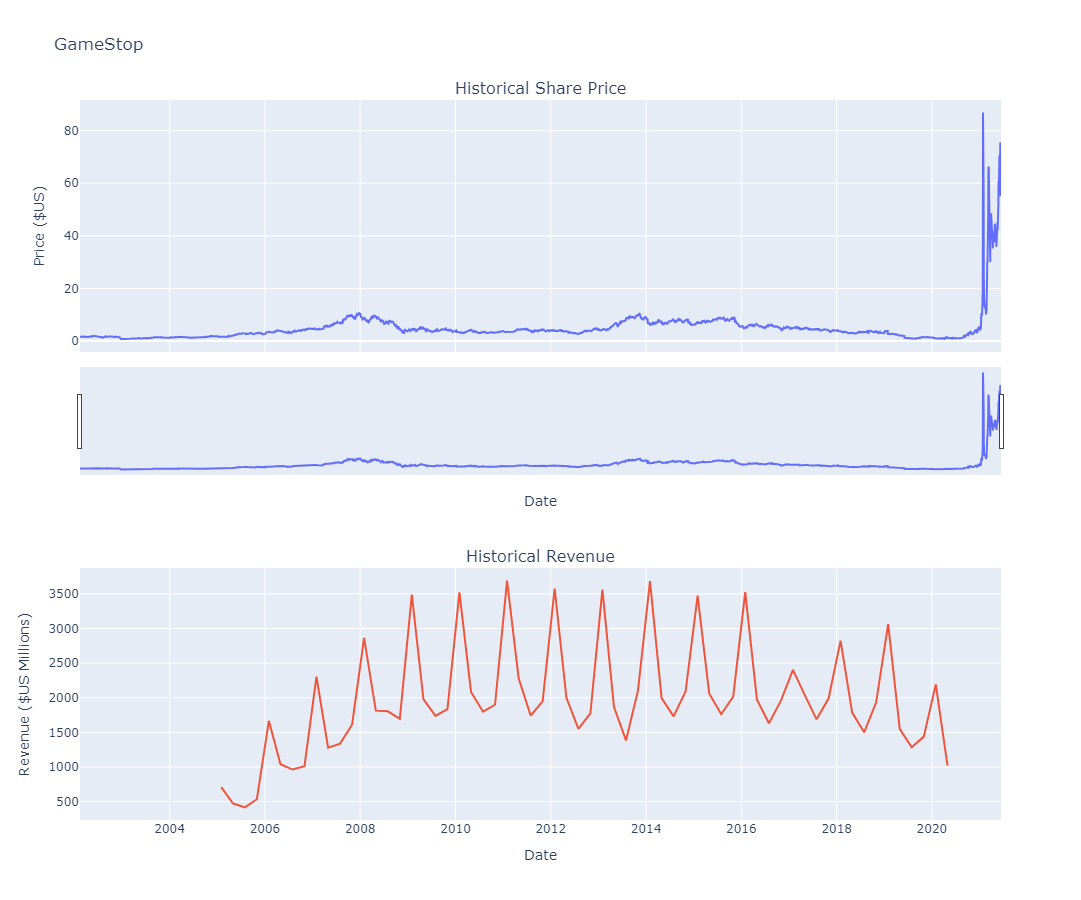

In [206]:
# Assuming `make_graph`, `gme_data`, and `gme_revenue` are already defined and ready to use

# Call the make_graph function with GameStop data
make_graph(gme_data, gme_revenue, 'GameStop')

# X ekseninde tarihleri, Y ekseninde ise hisse senedi fiyatlarını ve gelir bilgilerini gösteren bir grafik görürsünüz.
# Grafikte iki farklı veri seti aynı eksende gösterilir: birisi hisse senedi fiyatlarını, diğeri ise gelir verilerini temsil eder.
# Grafik, GameStop'un hisse senedi fiyatlarının ve gelirlerinin zaman içindeki değişimini görselleştirir.